### Segmentation

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from PIL import Image
from torchvision.transforms import ToPILImage
import torchvision.transforms as tf

/home/steve/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
i = 3
experiment = "prueva_loss" # "SinExtra"

In [27]:

image = torch.load('/home/steve/Documents/Outputs_Semantic/' + experiment + '/pt_files/' + str(i) + 'image.pt', map_location=torch.device('cpu'))

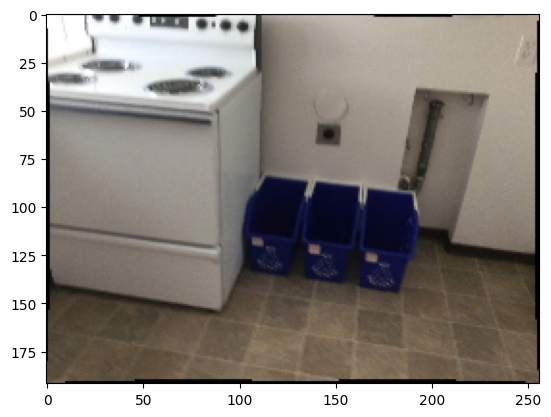

In [28]:
inverse_transform = tf.Compose([
    tf.Normalize(mean=[0, 0, 0], std=[1/0.229, 1/0.224, 1/0.225]),
    tf.Normalize(mean=[-0.485, -0.456, -0.406], std=[1, 1, 1]),
    tf.ToPILImage()
])

original_image = inverse_transform(image)
original_image_array = np.array(original_image)

# Plot the original image
plt.imshow(original_image_array)
plt.show()

2


/tmp/ipykernel_71453/2114526896.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_labels))


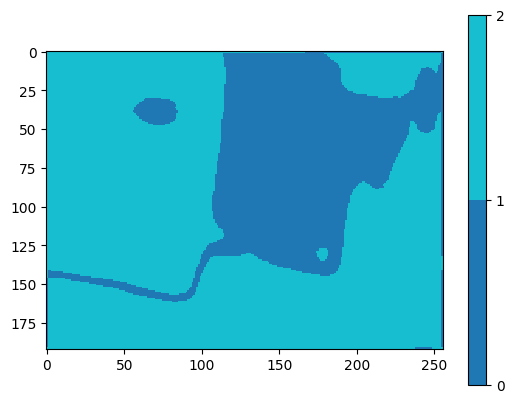

In [29]:
segmentation = torch.load('/home/steve/Documents/Outputs_Semantic/' + experiment + '/pt_files/' + str(i) + 'segmentations.pt', map_location=torch.device('cpu'))
segmentation = segmentation.reshape(192, 256, -1)
max_label = segmentation.shape[2] -1
print(max_label)
if max_label > 0:
    #make sure its prob
    sum_all_elements = torch.sum(segmentation)
    if sum_all_elements == 192 * 256:
        label_tensor = torch.argmax(segmentation, dim=-1)
        unique_labels = torch.unique(label_tensor)

        # Create a discrete colormap with a unique color for each label
        cmap = plt.cm.get_cmap('tab10', len(unique_labels))

        # Plotting the tensor values with discrete colors
        plt.imshow(label_tensor, cmap=cmap, interpolation='nearest', norm=mcolors.BoundaryNorm(unique_labels, cmap.N))
        plt.colorbar(ticks=unique_labels)
        plt.show()


In [30]:
segmentation.shape

torch.Size([192, 256, 3])

/tmp/ipykernel_71453/2435227583.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_labels))


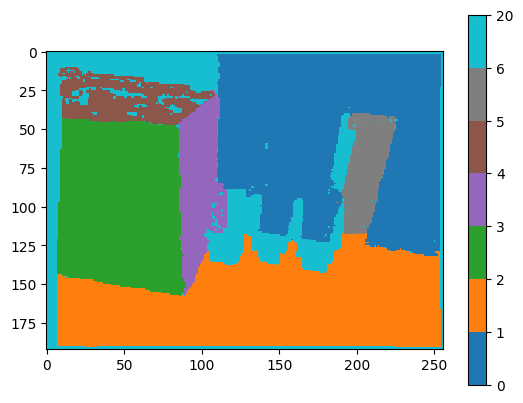

In [31]:
gt_seg = torch.load('/home/steve/Documents/Outputs_Semantic/' + experiment + '/pt_files/' + str(i) + 'gt_seg.pt', map_location=torch.device('cpu'))
unique_labels = torch.unique(gt_seg)

# Create a discrete colormap with a unique color for each label
cmap = plt.cm.get_cmap('tab10', len(unique_labels))

# Plotting the tensor values with discrete colors
plt.imshow(gt_seg, cmap=cmap, interpolation='nearest', norm=mcolors.BoundaryNorm(unique_labels, cmap.N))
plt.colorbar(ticks=unique_labels)
plt.show()


### Semantic

In [32]:
semantic = torch.load('/home/steve/Documents/Outputs_Semantic/' + experiment + '/pt_files/' + str(i) + 'semantics.pt', map_location=torch.device('cpu'))
print(semantic.shape)

torch.Size([192, 256])


In [33]:
id_dict = {
 0: 'unknown',
 1: 'wall',
 2: 'floor',
 3: 'cabinet',
 4: 'bed',
 5: 'chair',
 6: 'sofa',
 7: 'table',
 8: 'door',
 9: 'window',
 10: 'bookshelf',
 11: 'picture',
 12: 'counter',
 13: 'blinds',
 14: 'desk',
 15: 'shelves',
 16: 'curtain',
 17: 'dresser',
 18: 'pillow',
 19: 'mirror',
 20: 'floor mat',
 21: 'clothes',
 22: 'ceiling',
 23: 'books',
 24: 'refridgerator',
 25: 'television',
 26: 'paper',
 27: 'towel',
 28: 'shower curtain',
 29: 'box',
 30: 'whiteboard',
 31: 'person',
 32: 'night stand',
 33: 'toilet',
 34: 'sink',
 35: 'lamp',
 36: 'bathtub',
 37: 'bag',
 38: 'otherstructure',
 39: 'otherfurniture',
 40: 'otherprop'}

In [34]:
def plot_semantic(semantics, colormap):
    cmap = plt.colormaps[colormap]
    semantics = semantics.detach().numpy()
    labels = np.vectorize(id_dict.get)(np.unique(semantics))
    colors = [cmap(i)[0:3] for i in range(len(np.unique(semantics)))]
    mapping = dict(zip(labels, colors))

    plt.imshow(np.transpose(np.vectorize(mapping.get)(np.vectorize(id_dict.get)(semantics)), (1,2,0)))
    markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in mapping.values()]
    plt.legend(markers, mapping.keys(), numpoints=1)
    plt.tight_layout()

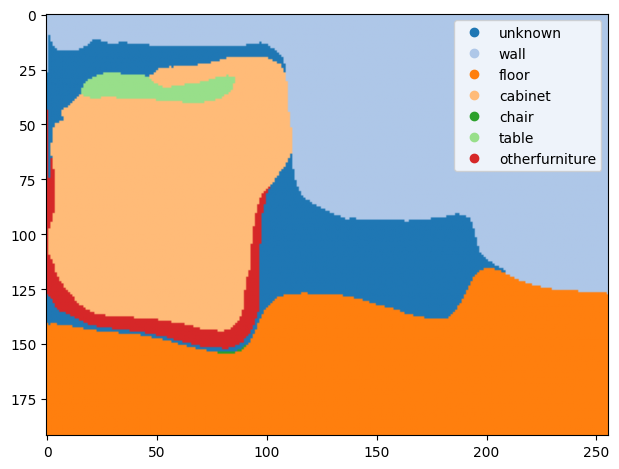

In [35]:
plot_semantic(semantic, 'tab20')

In [36]:
gt_class = torch.load('/home/steve/Documents/Outputs_Semantic/' + experiment + '/pt_files/' + str(i) + 'gt_class.pt', map_location=torch.device('cpu'))

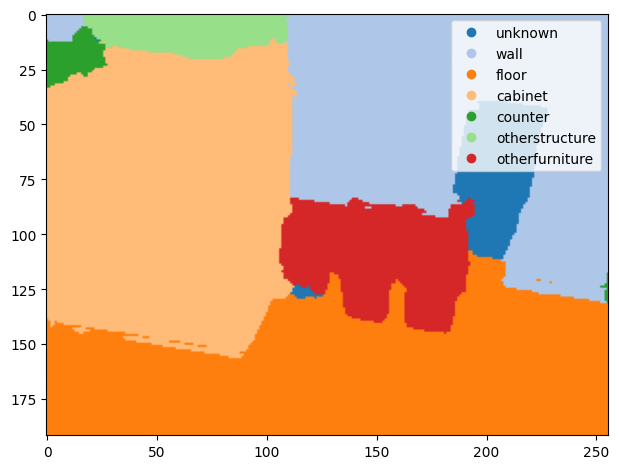

In [37]:
plot_semantic(gt_class, 'tab20')